# Fase (1): Análise exploratória e preparação dos dados

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.2, rc={'figure.figsize': (6,4),
                                              'figure.dpi': 100})

In [87]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [88]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [90]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [91]:
df.describe(include='object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [92]:
df.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [93]:
# Selecionando colunas categóricas
cat_cols = [i for i in df.columns if df[i].dtype == 'O']

In [94]:
# Selecionando colunas numéricas
num_cols = [i for i in df.columns if df[i].dtype != 'O']

In [95]:
cat_cols, num_cols

(['Gender',
  'family_history_with_overweight',
  'FAVC',
  'CAEC',
  'SMOKE',
  'SCC',
  'CALC',
  'MTRANS',
  'NObeyesdad'],
 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'])

In [96]:
df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'NObeyesdad']].groupby('NObeyesdad').mean()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
NObeyesdad,,,,,,,,
Insufficient_Weight,19.783237,1.691117,49.906330,2.480788,2.914403,1.871281,1.250131,0.839459
Normal_Weight,21.738676,1.676585,62.155052,2.334495,2.738676,1.850174,1.247387,0.675958
Obesity_Type_I,25.884941,1.693804,92.870198,2.186050,2.431862,2.112218,0.986748,0.676743
Obesity_Type_II,28.233785,1.771795,115.305311,2.391284,2.744555,1.877658,0.971857,0.515186
Obesity_Type_III,23.495554,1.687559,120.941114,3.000000,3.000000,2.208493,0.664817,0.604623
Overweight_Level_I,23.417674,1.687836,74.266828,2.264631,2.504218,2.058725,1.056796,0.612992
Overweight_Level_II,26.996981,1.703748,82.085271,2.260578,2.495529,2.025133,0.958072,0.697275


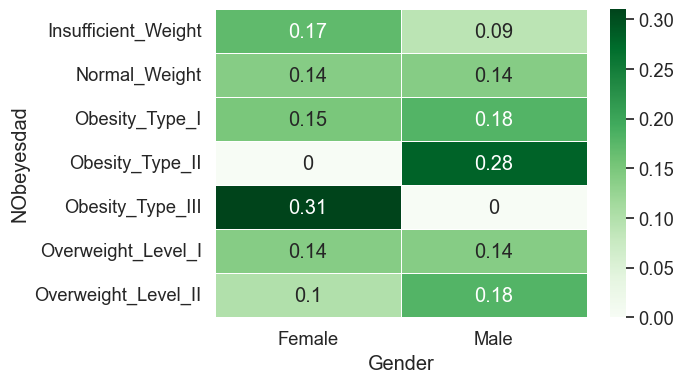

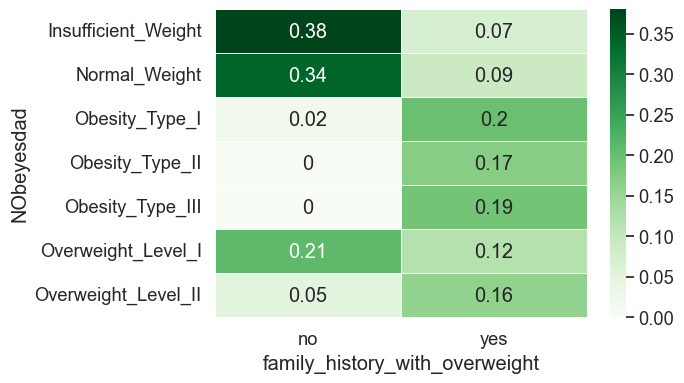

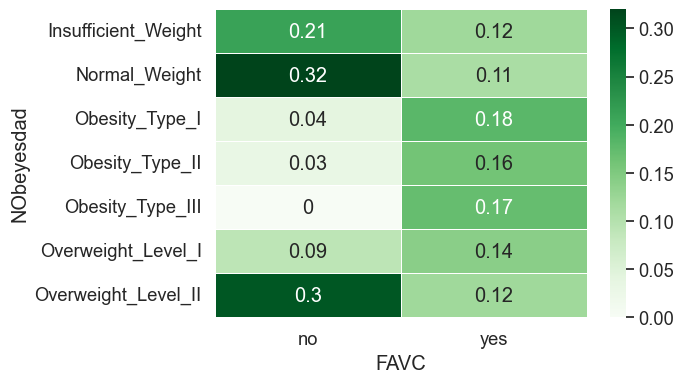

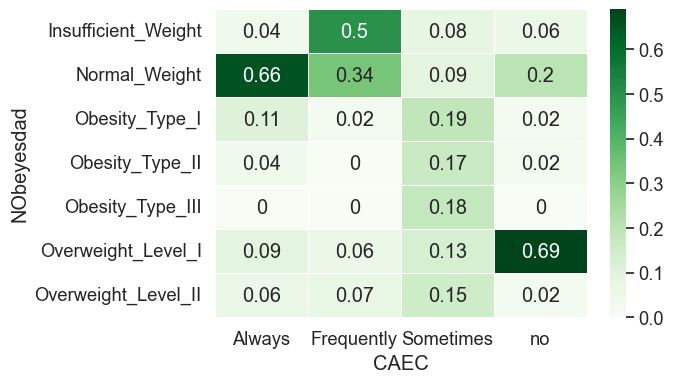

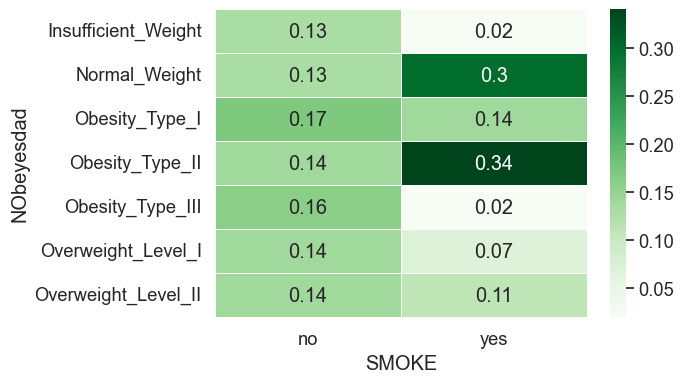

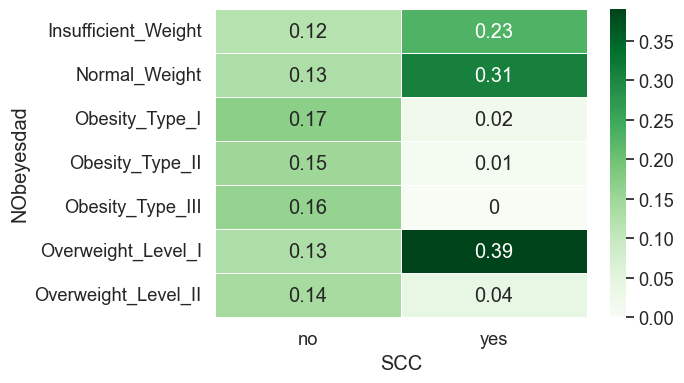

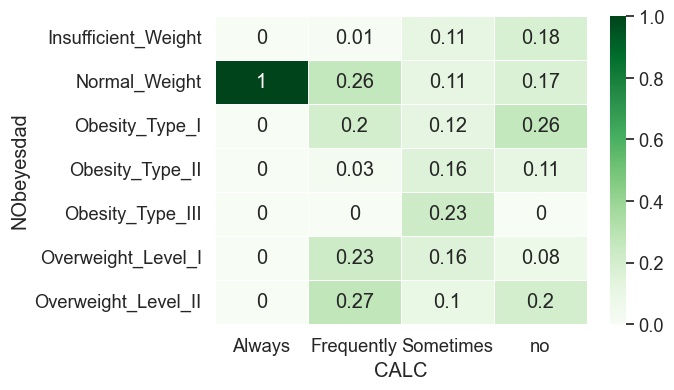

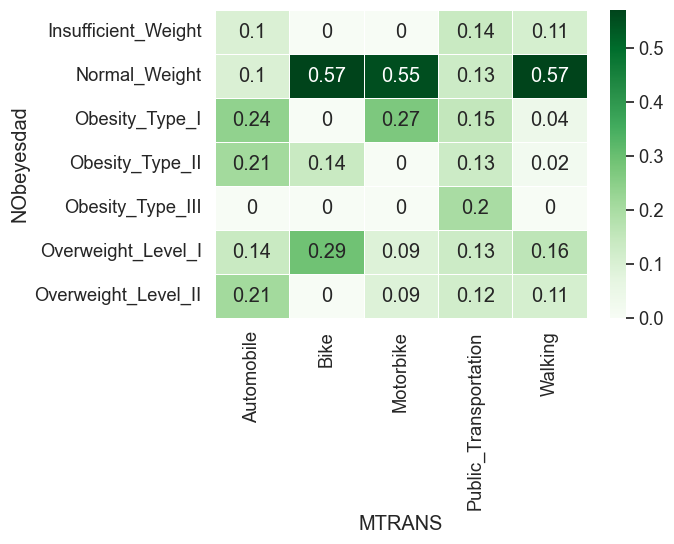

In [97]:
for i in cat_cols[:-1]:
    sns.heatmap(pd.crosstab(index=df['NObeyesdad'], columns=df[i], normalize='columns').round(2), 
                linewidths=.5, 
                annot=True,
               cmap='Greens')
    plt.show()

### Normalização dos dados (numéricos)

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
# Normalização por MinMaxScaler dos dados numéricos
scaler = MinMaxScaler()
dados_num = scaler.fit_transform(df[num_cols])

In [101]:
dados_num

array([[0.14893617, 0.32075472, 0.18656716, ..., 0.5       , 0.        ,
        0.5       ],
       [0.14893617, 0.13207547, 0.12686567, ..., 1.        , 1.        ,
        0.        ],
       [0.19148936, 0.66037736, 0.28358209, ..., 0.5       , 0.66666667,
        0.5       ],
       ...,
       [0.18136247, 0.5702    , 0.70663696, ..., 0.5270965 , 0.471403  ,
        0.323144  ],
       [0.22046672, 0.54613208, 0.70407941, ..., 0.9261695 , 0.37970233,
        0.2930175 ],
       [0.20563211, 0.54497358, 0.70501971, ..., 0.9317565 , 0.34215067,
        0.3570685 ]])

In [104]:
# Criando um dataframe final pré-processado

# (1) DataFrame dos atributos numéricos
df_num = pd.DataFrame(data=dados_num, columns=num_cols)

# (2) DataFrame dos atributos categóricos
df_cat = df[cat_cols]

# (3) Dataframe concatenado
df_final = pd.concat([df_num, df_cat.drop(columns='NObeyesdad')], axis=1)

In [105]:
df_final.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,0.148936,0.320755,0.186567,0.5,0.666667,0.5,0.000000,0.5,Female,yes,no,Sometimes,no,no,no,Public_Transportation
1,0.148936,0.132075,0.126866,1.0,0.666667,1.0,1.000000,0.0,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation
2,0.191489,0.660377,0.283582,0.5,0.666667,0.5,0.666667,0.5,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation
3,0.276596,0.660377,0.358209,1.0,0.666667,0.5,0.666667,0.0,Male,no,no,Sometimes,no,no,Frequently,Walking
4,0.170213,0.622642,0.379104,0.5,0.000000,0.5,0.000000,0.0,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation


In [106]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Height                          2111 non-null   float64
 2   Weight                          2111 non-null   float64
 3   FCVC                            2111 non-null   float64
 4   NCP                             2111 non-null   float64
 5   CH2O                            2111 non-null   float64
 6   FAF                             2111 non-null   float64
 7   TUE                             2111 non-null   float64
 8   Gender                          2111 non-null   object 
 9   family_history_with_overweight  2111 non-null   object 
 10  FAVC                            2111 non-null   object 
 11  CAEC                            2111 non-null   object 
 12  SMOKE                           21

# Fase (2): Aplicação do k-protótipos

In [107]:
from kmodes.kprototypes import KPrototypes

In [108]:
# Identificação dos índices dos atributos categóricos. No nosso caso, inicia no índice 8
idx_cat = [i for i in range(8, len(df_final.columns))]

In [109]:
# Treinando um k-protótipos com 7 clusters, que seriam os níveis de obesidade

kproto = KPrototypes(n_clusters=7, random_state=42, n_jobs=-1)
kproto.fit(df_final, categorical=idx_cat)

KPrototypes(gamma=np.float64(0.12042800397729088), n_clusters=7, n_jobs=-1,
            random_state=42)

In [110]:
df['Clusters'] = kproto.labels_

In [111]:
df['Clusters'].value_counts()

Clusters
0    435
5    345
2    312
1    298
3    292
6    250
4    179
Name: count, dtype: int64

### Intepretação dos clusters

#### (1) Variáveis numéricas

In [112]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Clusters
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,2
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0


In [113]:
df.drop(columns=cat_cols).groupby('Clusters').mean()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Clusters,,,,,,,,
0,25.329812,1.762287,98.489552,2.114310,2.735141,2.229946,0.949734,0.225176
1,22.013172,1.757274,75.320488,2.442301,3.036798,2.380453,2.300727,0.918176
2,22.068435,1.713751,77.464779,1.889225,2.782235,1.862646,0.639969,1.413298
3,24.259749,1.697613,113.161177,2.966143,2.982609,2.633489,0.683295,0.569710
4,34.394538,1.627760,75.329094,2.212621,2.785670,1.518268,0.539179,0.125169
5,22.643719,1.665592,84.429515,2.843720,3.015892,1.430591,1.056362,0.684828
6,23.230404,1.622345,70.682172,2.505499,1.186046,1.776251,0.695350,0.604849


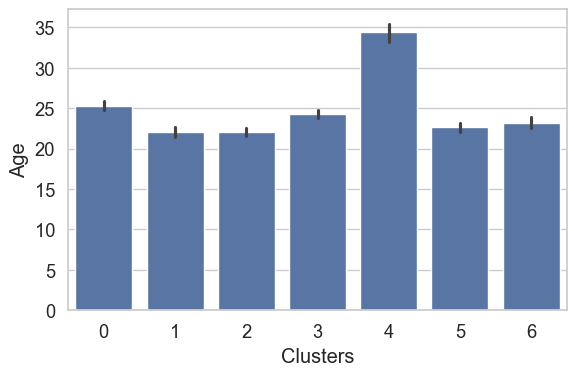

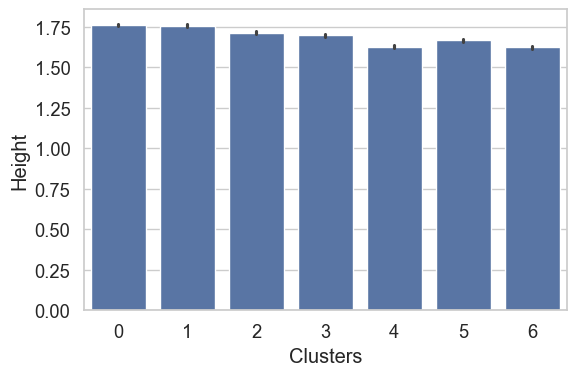

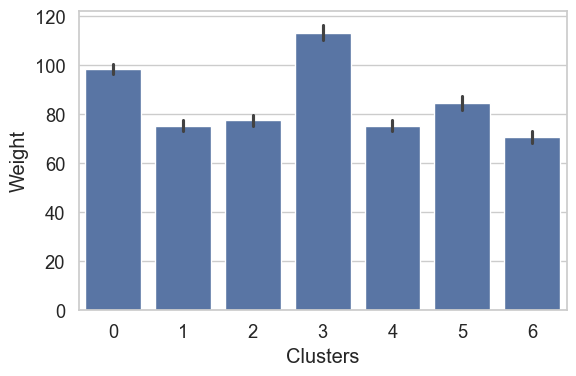

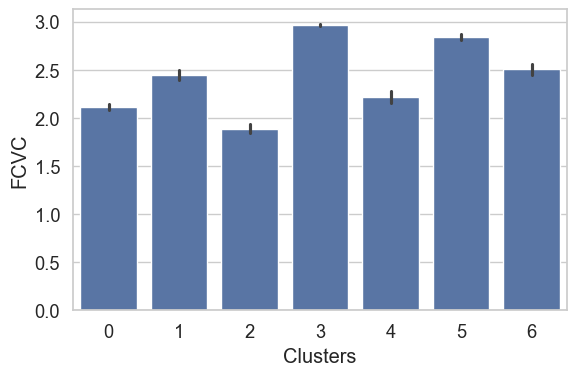

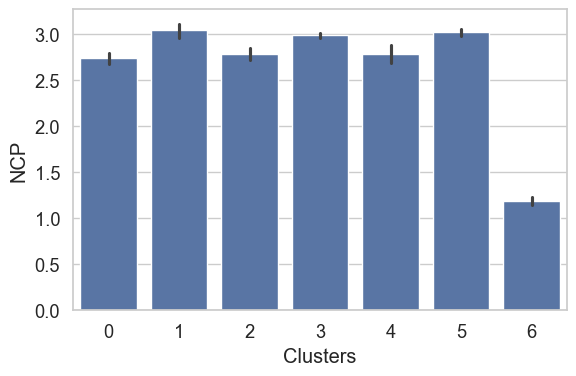

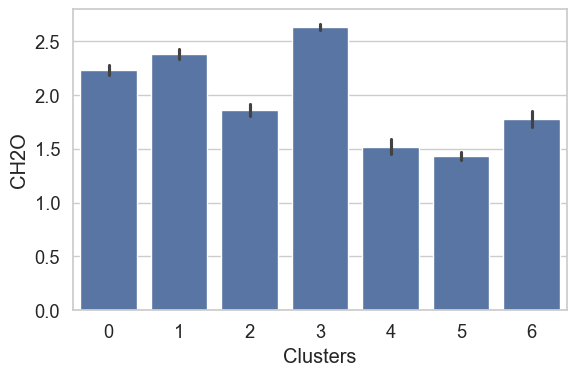

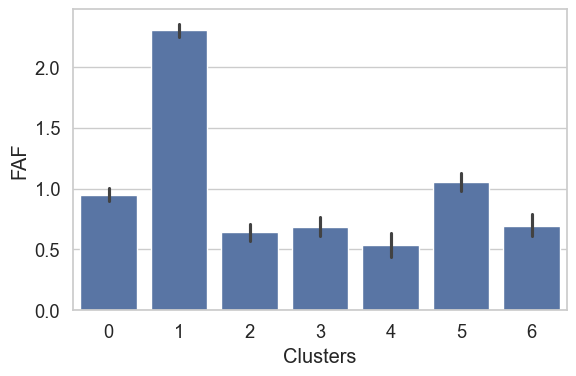

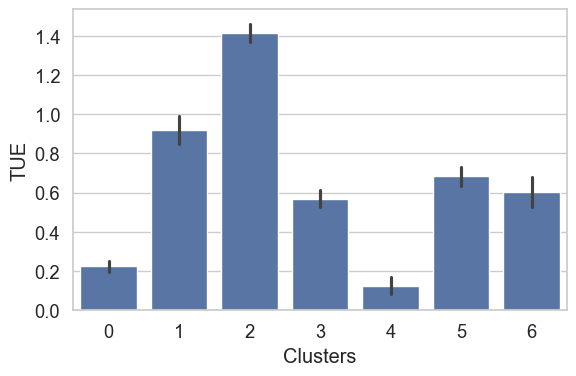

In [114]:
for i in num_cols:
    sns.barplot(data=df, x='Clusters', y=i, errorbar=('ci', 95))
    plt.tight_layout()
    plt.show()

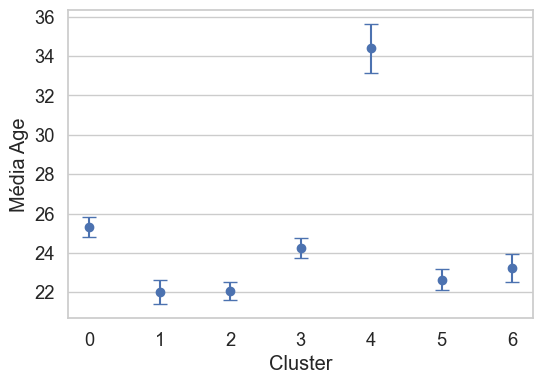

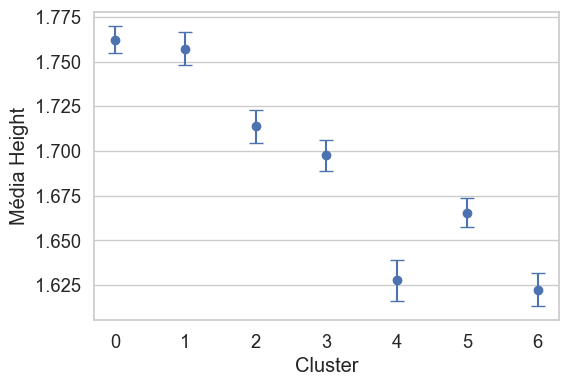

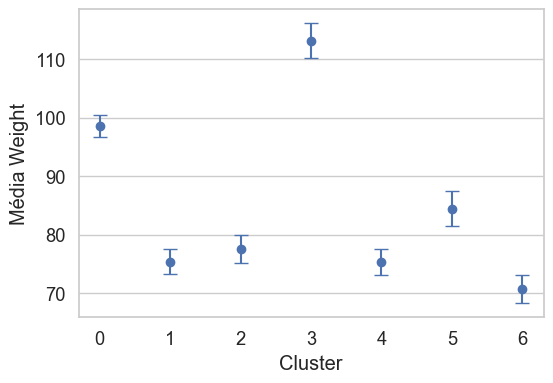

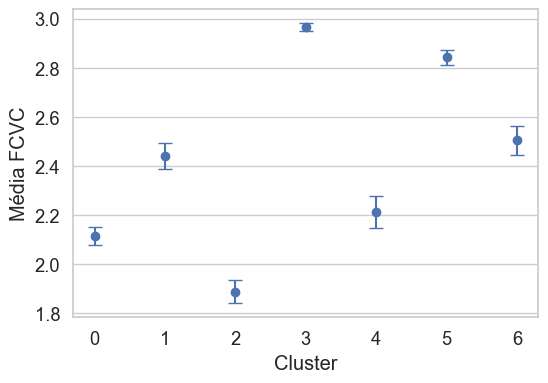

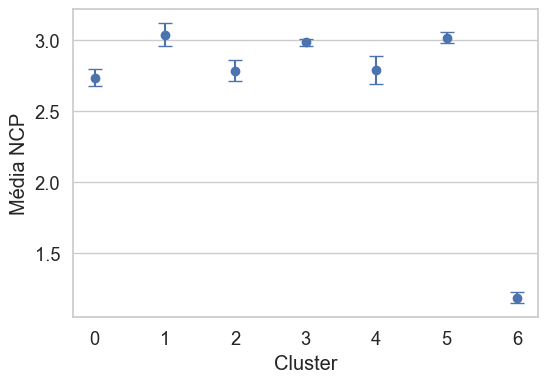

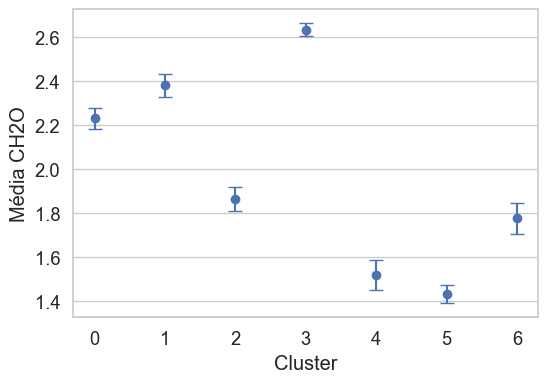

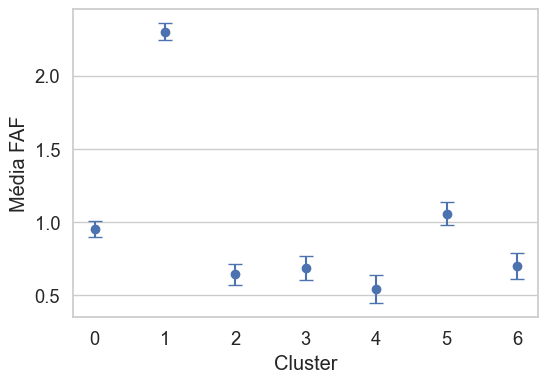

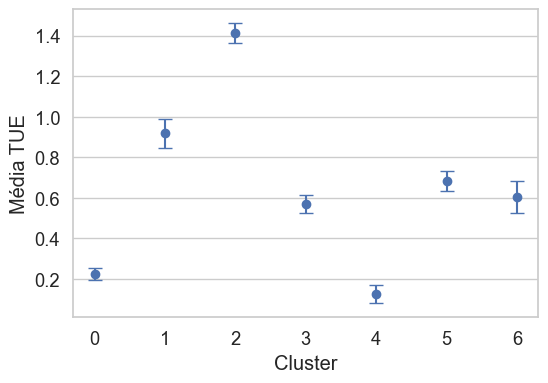

In [115]:
for i in num_cols:
    media_cluster = df.groupby('Clusters')[i].mean()
    erro_cluster = df.groupby('Clusters')[i].sem()
    
    ci = 1.96*erro_cluster
    
    plt.errorbar(x=media_cluster.index,
                y=media_cluster,
                yerr=ci,
                capsize=5,
                fmt='b o')
    plt.xlabel('Cluster')
    plt.ylabel(f'Média {i}')
    plt.yscale('linear')
    plt.grid(axis='x')
    plt.show()

#### (2) Variáveis categóricas

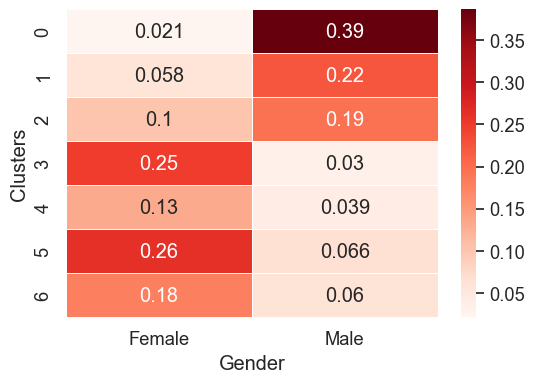

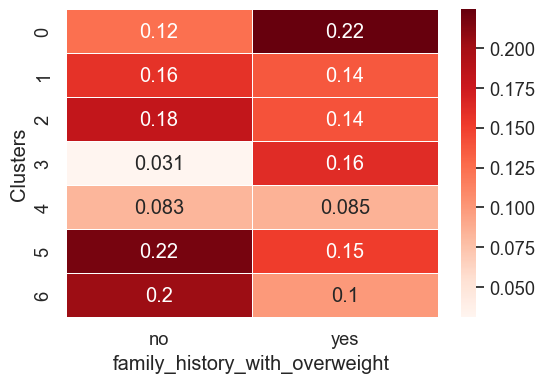

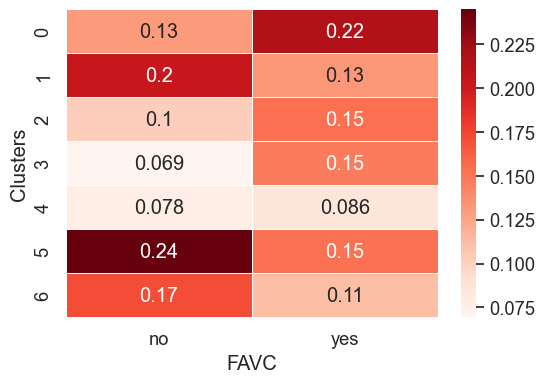

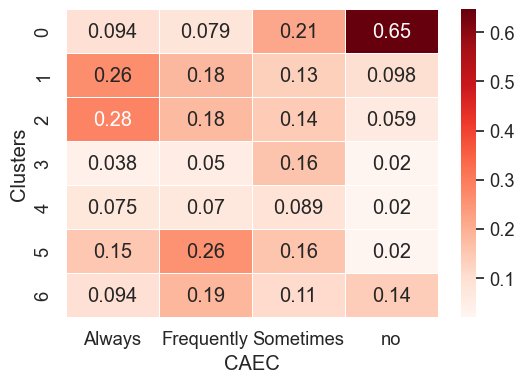

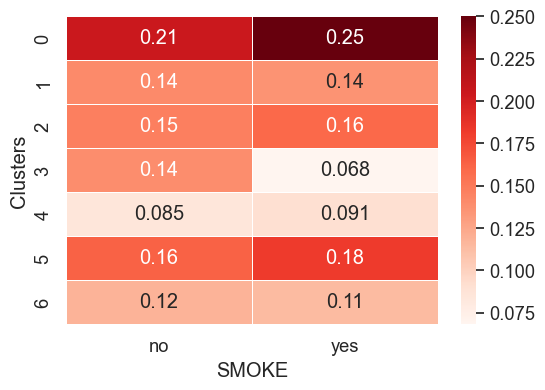

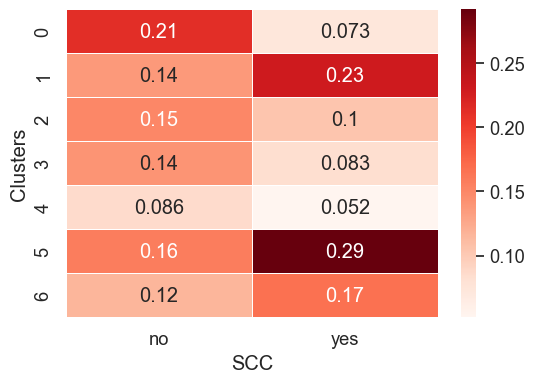

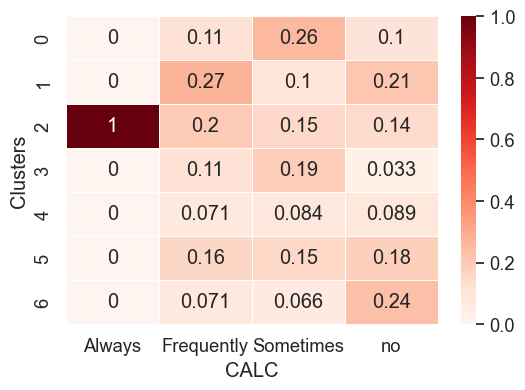

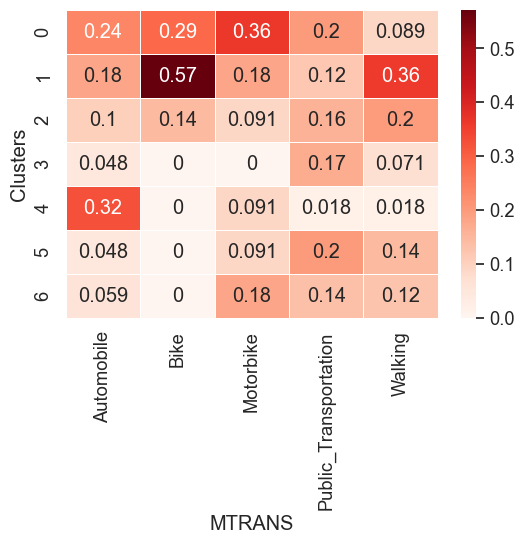

In [116]:
for i in cat_cols[:-1]:
    sns.heatmap(pd.crosstab(index=df['Clusters'], columns=df[i], normalize='columns'), 
                linewidths=.5, 
                annot=True,
               cmap='Reds')
    plt.show()